In [1]:
import os
import PIL
import sys
import pathlib
import numpy as np

# Setting paths to folders
sys.path.insert(1, '../classes')
sys.path.insert(1, '../tf_model')
sys.path.insert(1, '../test_data')

# Use this to disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"   

<h2>
Individual
</h2>

In [3]:
from Individual import *
i = Individual(10,5)
print(f"vals: {i.values}")
print(f"sigmas: {i.sigmas}")
print(f"alphas: {i.alphas}")

vals: [ 0.94680245  0.54958496  0.75275431 -0.04420414 -0.5673562  -0.7466361
 -0.07881219  0.75775385  0.79262754 -0.83888726]
sigmas: [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
 1.66666667 1.66666667 1.66666667 1.66666667]
alphas: [5.48061007 1.17656718 5.08559904 3.84875827 2.85326226 5.37096574
 4.63839167 5.88806206 4.80445926 3.9171155  4.76953516 3.20637032
 4.28760659 2.16734533 3.72590919 1.00612136 0.33209639 4.30248261
 0.32427593 1.12834233 2.30503285 5.95772419 1.21686654 3.67700628
 2.00448014 4.91853303 5.70256848 3.04899565 5.25679773 2.05279133
 0.64061183 1.1145325  1.01519257 5.11587179 4.56478292 3.54768218
 5.82922851 0.93905147 4.18680331 2.03455024 0.61931888 3.68550251
 4.97276153 5.2771228  3.77450994]


<h2>
Individual: copy
</h2>

In [4]:
i_copy = i.copy_individual()
i_copy.values = 54
i.values

array([ 0.94680245,  0.54958496,  0.75275431, -0.04420414, -0.5673562 ,
       -0.7466361 , -0.07881219,  0.75775385,  0.79262754, -0.83888726])

<h2>
Population
</h2>

In [5]:
def eval_fun(values):
    return sum(values)

In [6]:
from Population import *
p = Population(4,5)
print(f"population shape: (n_individuals: {len(p.individuals)}, n_elements:{len(p.individuals[0].values)})")
p.evaluate_fitness(eval_fun)
print()
print(f'all fitnesses: {p.all_fitnesses()}')
print(f'max: {p.max_fitness()}')
print(f'min: {p.min_fitness()}')
print(f'avg: {p.ave_fitness()}')
print(f'best: {p.best_fitness(is_min=True)}')

population shape: (n_individuals: 4, n_elements:5)

all fitnesses: [ 0.78771131 -0.32887011  0.70488235  1.46572476]
max: 1.4657247632325006
min: -0.32887011349564776
avg: 0.6573620789847822
best: -0.32887011349564776


<h2>Mutation: CustomSigma</h2>

In [7]:
from Mutation import CustomSigma
c = CustomSigma()
print(f'before mutation: {i.values}')
c.mutate(i)
print()
print(f'after mutation: {i.values}')

before mutation: [ 0.94680245  0.54958496  0.75275431 -0.04420414 -0.5673562  -0.7466361
 -0.07881219  0.75775385  0.79262754 -0.83888726]

after mutation: [ 0.77769383 -0.06089547  3.41287916  2.38501607 -1.01203996 -1.08293058
 -1.85316206  1.3315899  -0.33320891 -1.41049212]


In [8]:
p = Population(10,5)
print(p.individuals[2].values)
for ind in p.individuals:
    c.mutate(ind)
print(p.individuals[2].values)

[ 0.76298448 -0.16658928  0.46452393  0.19580548 -0.05213554]
[ 1.14852339 -0.35779664 -0.50886629  0.75444977  0.73069213]


<h2> 
Selection: 1 + l
</h2>

In [9]:
parent = Population(6,10)
parent.evaluate_fitness(eval_fun)
offspring = Population(30,10)
offspring.evaluate_fitness(eval_fun)
print(f'parent fitnesses: {parent.all_fitnesses()}')
print()
print(f'offspring fitnesses: {offspring.all_fitnesses()}')
print()
from Selection import OnePlusL
s = OnePlusL()
p = s.select(parent, offspring)
print(f'fitnesses after selection: {p.all_fitnesses()}')

parent fitnesses: [ 1.06206333  0.11409858 -0.23839099 -0.37451995 -0.07955202 -6.39523634]

offspring fitnesses: [ 1.35461228  0.31046564  0.94903402  0.50792115  2.0354675  -2.27604188
  2.24808605  2.20179589 -3.52266087  0.74665011  1.53833943  0.70857658
 -3.07272435  0.0466842  -2.86083762 -2.45751407 -0.82580503  2.03682257
 -0.79297381  0.65459445 -0.50192171  0.73146977  0.70560739 -0.18538854
  2.44056966  1.47096864  3.15921589  1.99147847  3.35747044 -3.59031591]

fitnesses after selection: [-6.39523634 -3.59031591 -3.52266087 -3.07272435 -2.86083762 -2.45751407]


<h2> 
Selection: 1 , l
</h2>

In [10]:
parent = Population(6,10)
parent.evaluate_fitness(eval_fun)
offspring = Population(30,10)
offspring.evaluate_fitness(eval_fun)
print(f'parent fitnesses: {parent.all_fitnesses()}')
print()
print(f'offspring fitnesses: {offspring.all_fitnesses()}')
print()

from Selection import OneCommaL
s = OneCommaL()
p = s.select(parent, offspring)
print(f'fitnesses after selection: {p.all_fitnesses()}')

parent fitnesses: [ 1.14482308 -1.32807442 -0.39818983  1.46109242  0.95377521 -1.80952949]

offspring fitnesses: [-1.63478589 -0.05983521 -0.15594489  1.0683141  -2.14536891  0.35244271
  2.79139986 -1.03215334 -0.07688119 -1.49463227  0.02662252 -0.20638773
 -0.20823686 -1.29552332  1.71767599  1.20835391 -1.44002792 -0.29554831
 -0.81551479 -2.56855888 -0.99632432  2.00816277  1.88616833 -2.64957886
  1.87618122 -0.47971778 -1.31340825  1.16873231 -0.05124883  0.10813937]

fitnesses after selection: [-2.64957886 -2.56855888 -2.14536891 -1.63478589 -1.49463227 -1.44002792]


<h2>
Recombination: Intermediate
</h2>

In [14]:
from Recombination import Intermediate
parent = Population(6,10)
r = Intermediate(3)
off = r.recombine(parent)
print(off)
for i in off.individuals:
    print(i.values)

NameError: name 'Population' is not defined

In [2]:
from SimpleClassifier import *
model = SimpleClassifier(sys.path[2]+'/model/simple_classifier')

2022-03-19 15:46:45.345760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 15:46:45.349342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 15:46:45.349545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 15:46:45.349951: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
batch_size = 32
img_height = 128
img_width = 128

In [4]:
#img = PIL.Image.open(sys.path[1]+'/flower.webp')
img = PIL.Image.open(sys.path[1]+'/daisy.jpg')
img = img.resize((img_width,img_height))
img_array = np.array(img)
img_exp = np.expand_dims(img_array,axis=0)

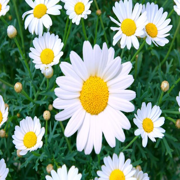

In [5]:
PIL.Image.open(sys.path[1]+'/daisy.jpg').resize((180,180))

In [6]:
preds = model.model.predict(img_exp)
print(preds)

2022-03-19 15:46:52.146201: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


[[9.9996483e-01 1.8243945e-05 3.8085109e-06 2.9760618e-06 1.0114620e-05]]
